In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from tensorflow.keras.datasets import mnist

In [45]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

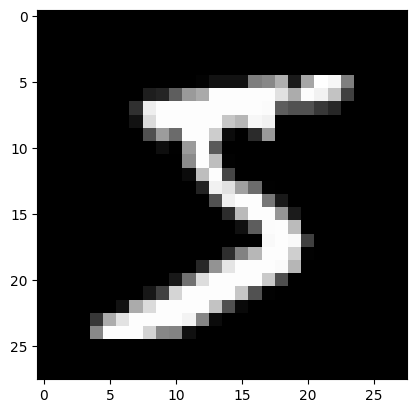

In [46]:
plt.imshow(x_train[0], cmap='gray')

In [47]:
y_train == 5

array([ True, False, False, ...,  True, False, False])

In [48]:
only_fives = x_train[y_train == 5]

In [49]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Sequential

In [50]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28, 28]))  # Achata a imagem de 28x28 para um vetor 1D
discriminator.add(Dense(150, activation='relu'))  # Camada oculta com 150 neurônios
discriminator.add(Dense(100, activation='relu'))  # Outra camada oculta
discriminator.add(Dense(1, activation='sigmoid')) # Saída: 0 (falsa) ou 1 (real)
discriminator.compile(loss='binary_crossentropy', optimizer='adam')

In [51]:
codings_size = 100  # Dimensão do ruído de entrada

generator = Sequential()
generator.add(Dense(100, activation = 'relu', input_shape=[codings_size]))  # Entrada: ruído aleatório
generator.add(Dense(150, activation = 'relu'))
generator.add(Dense(784, activation = 'relu'))  # Saída: 784 pixels (28x28)
generator.add(Reshape([28,28]))  # Converte a saída de volta para formato 28x28


In [52]:
GAN = Sequential([generator, discriminator]) 

In [53]:
discriminator.trainable = False  # Congela o discriminador para treinar apenas o gerador

In [54]:
GAN.compile(loss='binary_crossentropy', optimizer='adam')

In [55]:
batch_size = 32

In [56]:
my_data = only_fives
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [57]:
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [58]:
epochs = 150

In [59]:
GAN.layers[0].summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 150)            │        15,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 784)            │       118,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 143,634 (561.07 KB)

 Trainable params: 143,634 (561.07 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
generator, discriminator = GAN.layers  # Separa as camadas do modelo

for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    i = 0
    for X_batch in dataset:
        i = i+1
        if i%100 == 0:
            print(f"\tCurrently on batch number {i} of {len(my_data)//batch_size}")
        noise = tf.random.normal(shape=[batch_size, codings_size])  # Gera ruído aleatório
        gen_images = generator(noise)  # Cria imagens falsas
        X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch, tf.float32)], axis=0)  # Junta imagens reais e falsas
        y1 = tf.constant([[0.]]*batch_size + [[1.]]*batch_size)  # 0 para falsas, 1 para reais
        discriminator.trainable = True  # Permite o treinamento do discriminador
        discriminator.train_on_batch(X_fake_vs_real, y1)  # Treina o discriminador

        
        # Train the generator
        noise = tf.random.normal(shape=[batch_size, codings_size])  # Novo ruído
        y2 = tf.constant([[1.]]*batch_size)  # Engana o discriminador fazendo-o pensar que tudo é real
        discriminator.trainable = False  # Congela o discriminador para treinar apenas o gerador
        GAN.train_on_batch(noise, y2)  # Treina a GAN

Currently on Epoch 1
	Currently on batch number 100 of 169
Currently on Epoch 2
	Currently on batch number 100 of 169
Currently on Epoch 3
	Currently on batch number 100 of 169
Currently on Epoch 4
	Currently on batch number 100 of 169
Currently on Epoch 5
	Currently on batch number 100 of 169
Currently on Epoch 6
	Currently on batch number 100 of 169
Currently on Epoch 7
	Currently on batch number 100 of 169
Currently on Epoch 8
	Currently on batch number 100 of 169
Currently on Epoch 9
	Currently on batch number 100 of 169
Currently on Epoch 10
	Currently on batch number 100 of 169
Currently on Epoch 11
	Currently on batch number 100 of 169
Currently on Epoch 12
	Currently on batch number 100 of 169
Currently on Epoch 13
	Currently on batch number 100 of 169
Currently on Epoch 14
	Currently on batch number 100 of 169
Currently on Epoch 15
	Currently on batch number 100 of 169
Currently on Epoch 16
	Currently on batch number 100 of 169
Currently on Epoch 17
	Currently on batch number 

In [61]:
noise = tf.random.normal(shape=[10, codings_size])

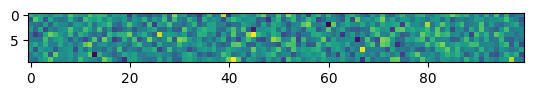

In [62]:
plt.imshow(noise)

In [63]:
images = generator(noise)

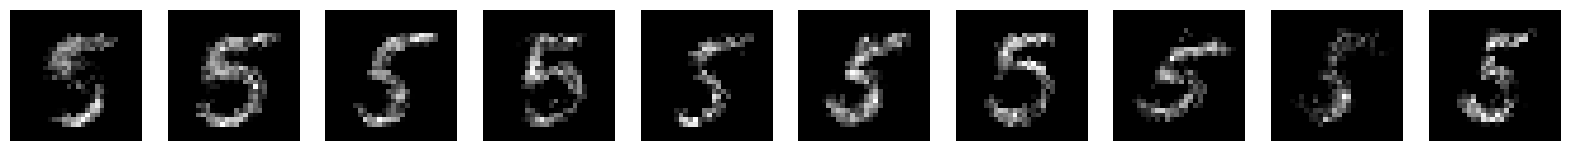

In [70]:
# Exibir as 10 imagens geradas
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')